In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

train_data = pd.read_csv('./train.csv')

# Data Overview

In [3]:
# shape of data
train_data.shape

(10886, 12)

In [4]:
# get a overview about the data
train_data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
# types of features
train_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# EDA and Feature Engineering

## Missing Data

In [7]:
# find if there a missing value or not 
train_data.isnull().sum()  

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

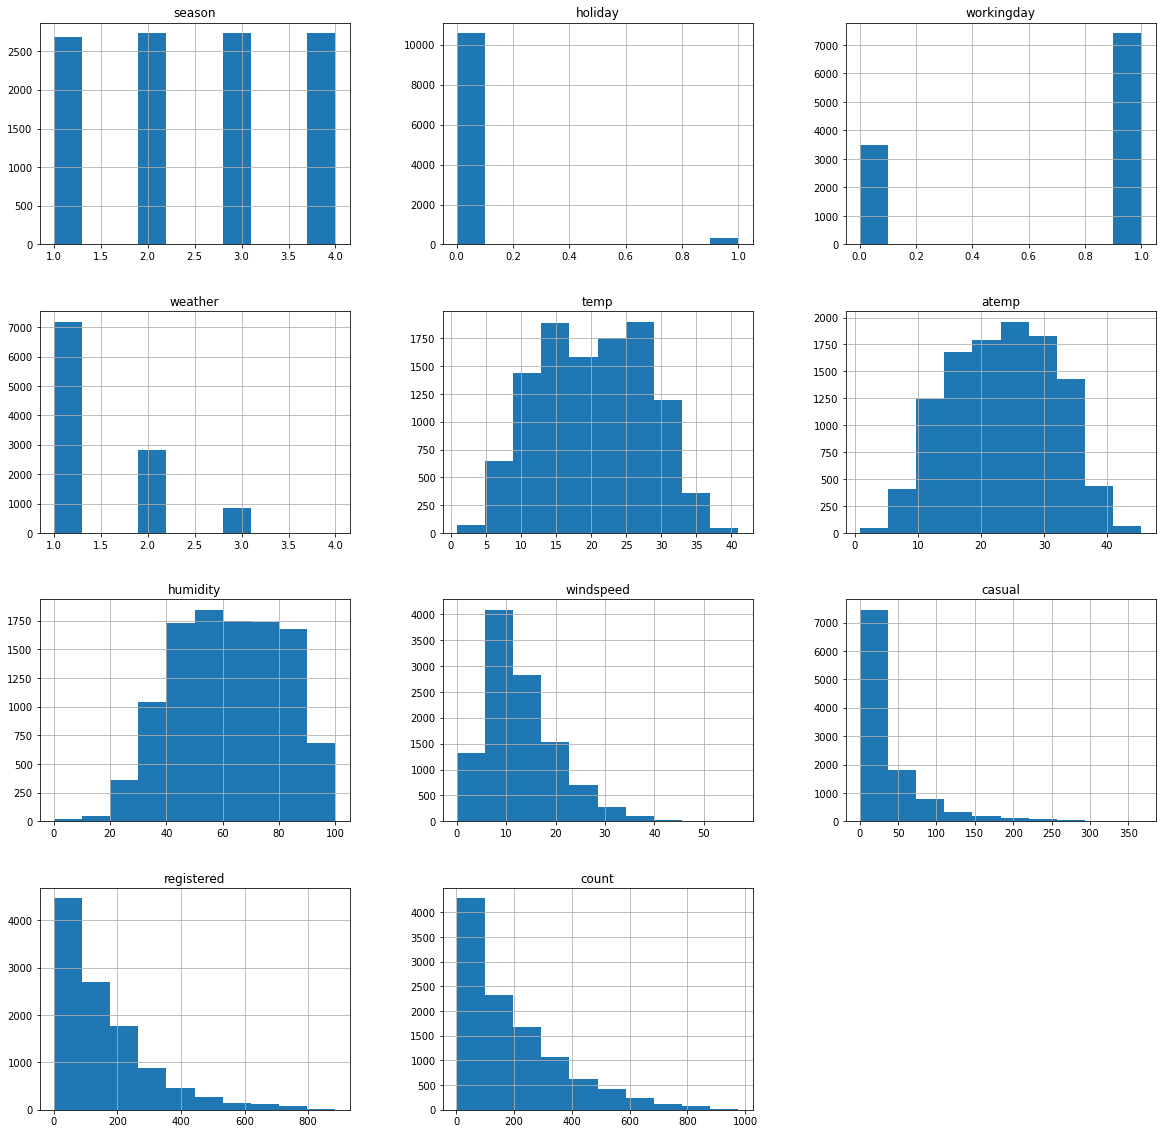

In [8]:
train_data.hist(figsize=(20,20))

In [9]:
# convert datetime
def spilt_datetime(data_frame):
    """function to spilt datetime into hour, day, month, year

    Args:
        data_frame (panda series): [contain datetime column]

    Returns:
        [panda series]: [without datetime column]
    """ 
    data_frame['datetime'] = pd.to_datetime(data_frame['datetime'], errors='coerce')
    
    data_frame['day'] =  data_frame['datetime'].dt.day
    data_frame['month'] = data_frame['datetime'].dt.month
    data_frame['year'] = data_frame['datetime'].dt.year
    data_frame['hour'] = data_frame['datetime'].dt.hour
 
    
    return data_frame.drop(['datetime'], axis=1)
    

train_data = spilt_datetime(train_data)

In [10]:
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,4


In [11]:
# Find the correlation between the features
corr = train_data.corr()
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.001729,0.971524,-0.004797,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.015877,0.001731,0.012021,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.009829,-0.003394,-0.002482,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.007890,0.012144,-0.012548,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.015551,0.257589,0.061226,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.011866,0.264173,0.058540,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.011335,0.204537,-0.078606,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.036157,-0.150192,-0.015221,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.014109,0.092722,0.145241,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.019111,0.169451,0.264265,0.380540


<AxesSubplot:>

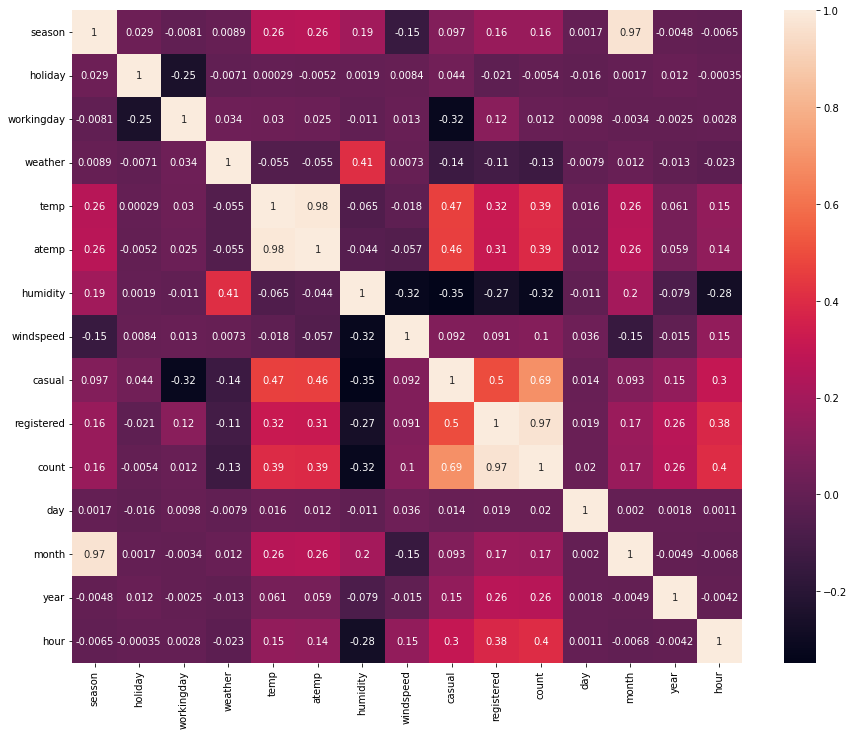

In [12]:
# heatmap of correlation between the fatures
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True)


### As shown, highly correlated features:
- season and month
- temp and atemp
- registered and count
- casual and count



## Outliers Analysis

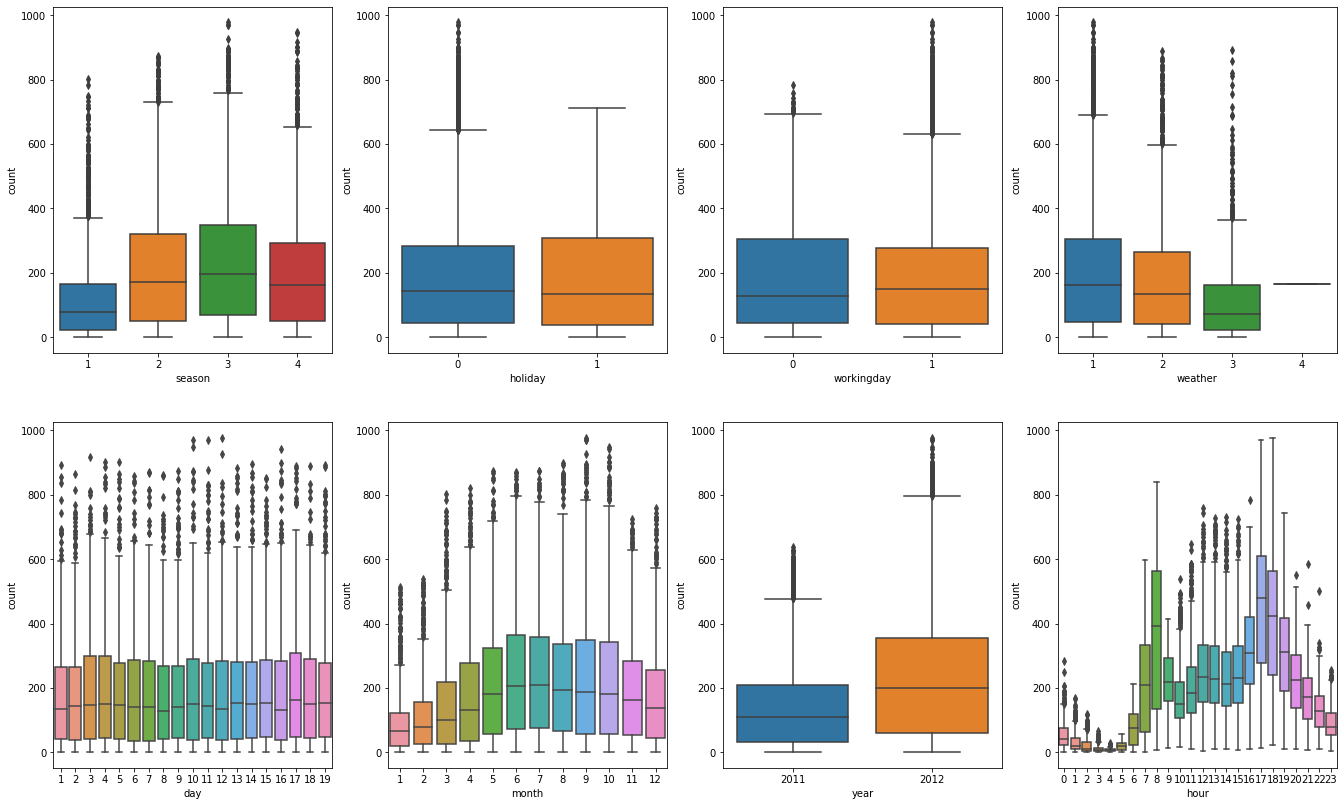

In [14]:
categorical = ['season', 'holiday', 'workingday', 'weather', 'day', 'month', 'year', 'hour']
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(23, 14)
index = 0
for i in range(2):
    for j in range(4):
        sns.boxplot(x=categorical[index], y='count', data=train_data, ax=axes[i][j])
        index += 1
    

Remove Outliers In The Count Column

In [15]:
train_data_without_outliers = train_data[
    np.abs(train_data["count"]-train_data["count"].mean()) <= (3*train_data["count"].std())
] 

In [16]:
train_data_without_outliers.shape, train_data.shape
    

((10739, 15), (10886, 15))

In [17]:
train_data = train_data_without_outliers

### normal distribution of the data

<AxesSubplot:>

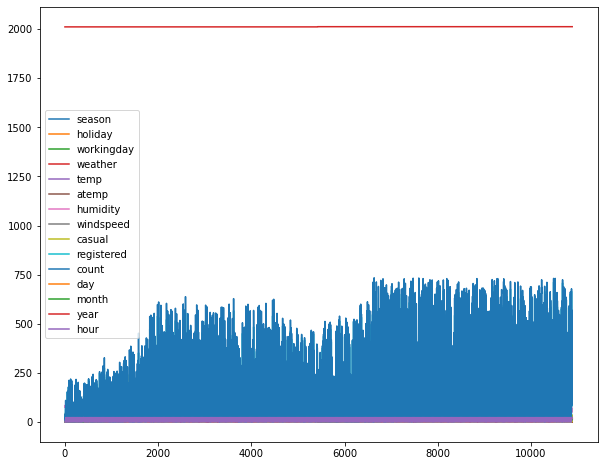

In [18]:

train_data.plot(figsize=(10,8)) 

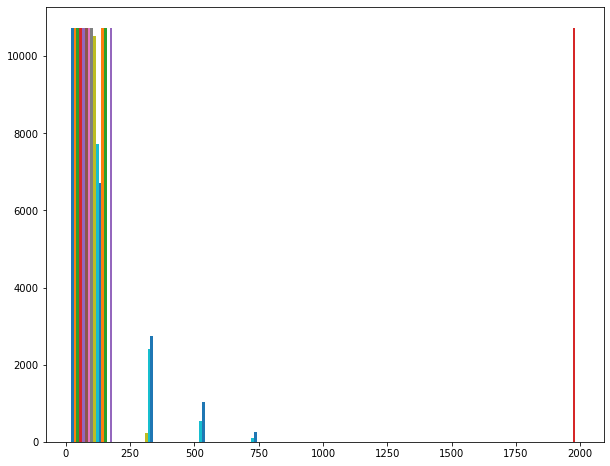

In [19]:
plt.figure(figsize=(10,8))
plt.hist(train_data) 
plt.show()

### Based on the above EDA, I dropped the following variables 
### (season, holiday, workingday, atemp, casual, registered, year)

In [20]:
train_data = train_data.drop(['season', 'holiday', 'atemp', 'casual', 'registered', 'year', 'day'], axis=1)

### show variables based on the target variable

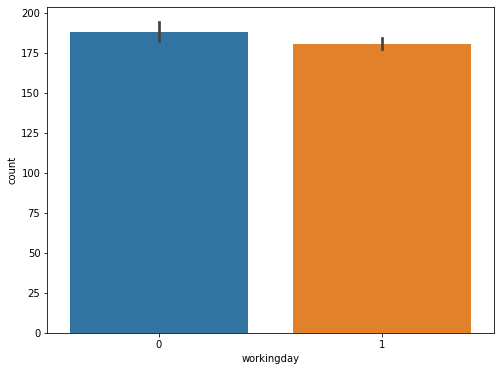

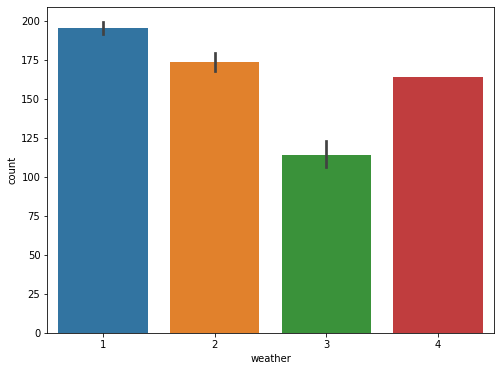

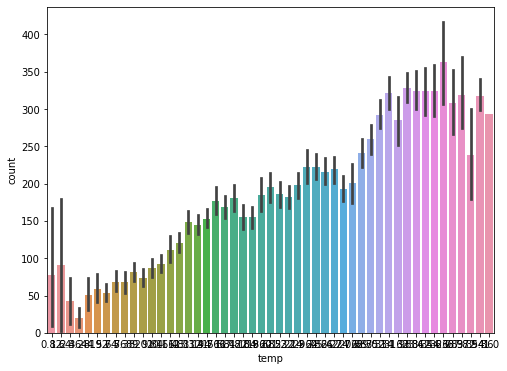

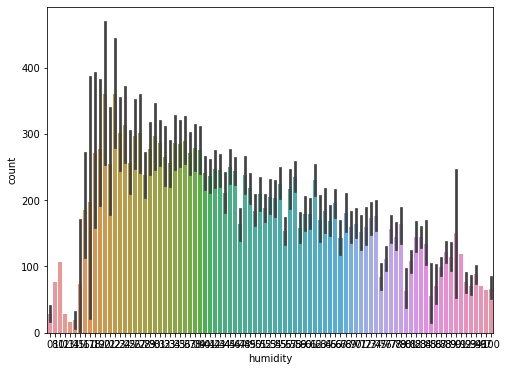

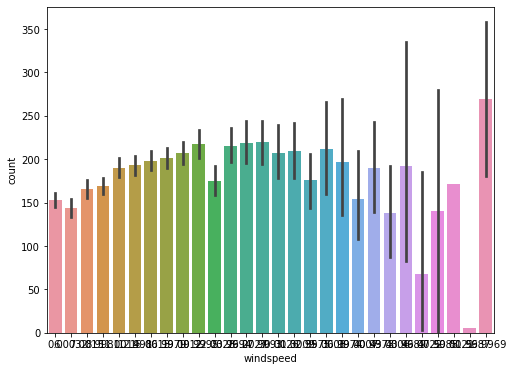

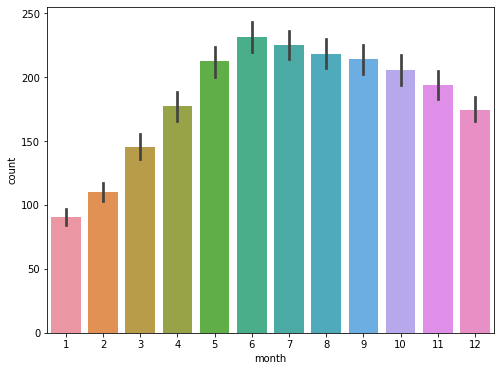

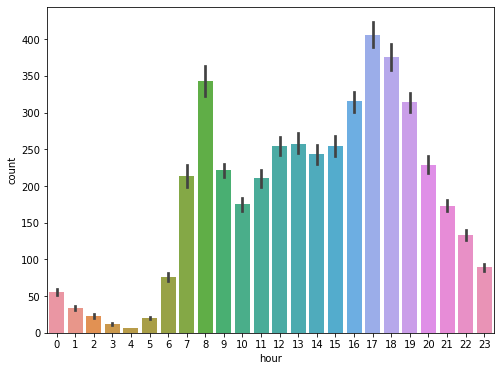

In [21]:
variables = list(train_data.columns)
variables.remove('count')
target_variable = 'count'

for var in variables:
    plt.figure(figsize=(8, 6))
    sns.barplot(y=target_variable, x=var, data=train_data)
    plt.show()

# Scaling the Features

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

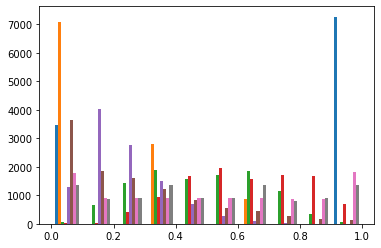

In [23]:
# Normalization 
normalize = MinMaxScaler()
normalize_data = normalize.fit_transform(train_data)
plt.hist(normalize_data) 
plt.show()

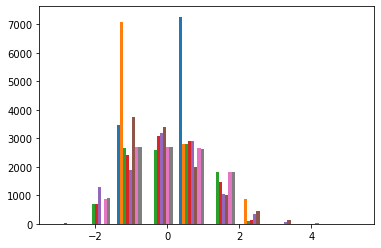

In [24]:
# Standardization 
standard_scaler = StandardScaler()
standardization = standard_scaler.fit_transform(train_data)
plt.hist(standardization) 
plt.show()


## It is clear that standardization is better for our machine models

***



# Machine Larning Models
- Linear regression
- Linear regression polynomial features

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [26]:
train_data.columns

Index(['workingday', 'weather', 'temp', 'humidity', 'windspeed', 'count',
       'month', 'hour'],
      dtype='object')

In [27]:
y = np.array(train_data['count'])
x = np.array(train_data.drop(['count'], axis=1))

In [28]:
x.shape, y.shape

((10739, 7), (10739,))

In [29]:
y = y.reshape((len(y),1))
y.shape

(10739, 1)

In [56]:
# Standardization the data
x = standard_scaler.fit_transform(x)
y = standard_scaler.fit_transform(y)


C:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
# split our data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7517, 7), (3222, 7), (7517, 1), (3222, 1))

In [35]:
def plot_modle(y_test, y_predicted):
    """ function to plot line based on test and predicted data

    Args:
        y_test (np.ndarray]): [contain test data]
        y_predicted (np.ndarray): [contain prediction data]
    """
    
    plt.figure(figsize=(8, 8))
    plt.scatter(y=y_test, x=y_predicted)
    plt.xlabel("predicted values")
    plt.ylabel("real values")

    # find minimum and maximum in the test target values
    mini = math.ceil(y_test.min())
    maxi = math.ceil(y_test.max())
    # plot a diagonal line accross the scattered plot to better see the difference in values
    
    plt.plot([mini, maxi], [mini, maxi], color='r', linewidth=3)

# Linear Regression model

score: 0.3389906240316153
mean squared error: 0.6374246837107549


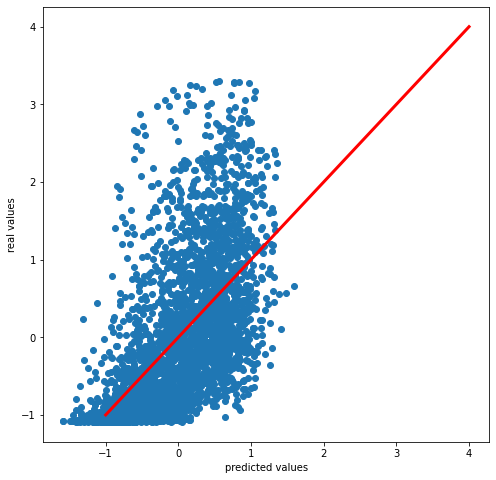

In [49]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
y_predicted = linear_model.predict(X=X_test)


print("score:", linear_model.score(X_train, y_train))
print("mean squared error:", mean_squared_error(y_test, y_predicted))
plot_modle(y_test, y_predicted)

# Linear regression polynomial features

score: 0.5756886972810582
mean squared error: 0.41729518934176874


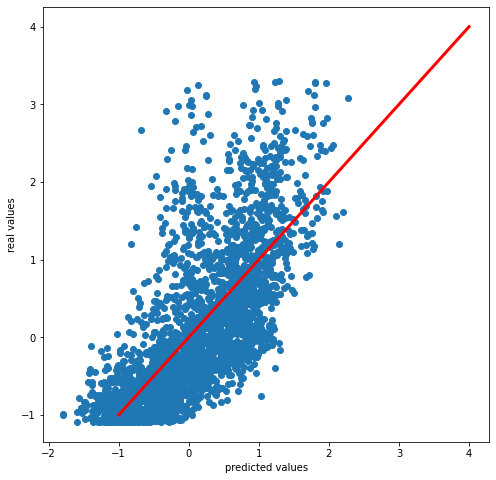

In [48]:
poly_features = PolynomialFeatures(degree=3)
poly_modle = LinearRegression()

X_poly_tran = poly_features.fit_transform(X_train)

# fit data into modle
poly_modle.fit(X_poly_tran, y_train)

# test modle 
X_poly_test = poly_features.fit_transform(X_test)
y_predicted_poly = poly_modle.predict(X_poly_test)

# show score and mean squared error
print("score:", poly_modle.score(X_poly_tran, y_train))
print("mean squared error:", mean_squared_error(y_test, y_predicted_poly))

# show the middle of line 
plot_modle(y_test, y_predicted_poly)

In [65]:
# small prediction test
arr = np.array([[0, 1, 15.84, 80, 0.0, 1, 0],
                [0, 2, 8, 15.65, 16.9, 7, 12]])
print(arr.shape)
arr = standard_scaler.fit_transform(arr)
poly_modle.predict(poly_features.fit_transform(arr))

(2, 7)


C:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 4.76051171e+11],
       [-6.18356394e+11]])

## Save the models objects into files

In [51]:
import pickle

pickle.dump(poly_modle, open('./app/modles/modle.sav', 'wb'))
pickle.dump(standard_scaler, open('./app/modles/scaler.sav', 'wb'))
pickle.dump(poly_features, open('./app/modles/polynomial.sav', 'wb'))